Unattacked Queens
===
The properties of chess pieces play a part in many challenges, including in a group of problems about unattacked queens. Imagine three white queens and five black queens on a 5 × 5 chessboard. Can you arrange them so that no queen of one color can attack a queen of the other color? There is only one solution, excluding reflections and rotations.
http://www.scientificamerican.com/article/martin-gardner-fans-try-these-mathematical-games/

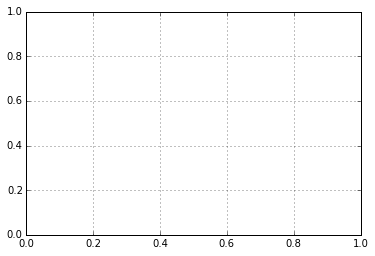

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
from copy import deepcopy

%matplotlib inline

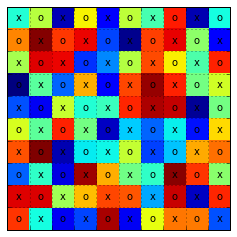

In [4]:
fig, ax = plt.subplots()

min_val, max_val, diff = 0., 10., 1.

#imshow portion
N_points = (max_val - min_val) / diff
imshow_data = np.random.rand(N_points, N_points)
ax.imshow(imshow_data, interpolation='nearest')

#text portion
ind_array = np.arange(min_val, max_val, diff)
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = 'x' if (x_val + y_val)%2 else 'o'
    ax.text(x_val, y_val, c, va='center', ha='center')

#set tick marks for grid
ax.set_xticks(np.arange(min_val-diff/2, max_val-diff/2))
ax.set_yticks(np.arange(min_val-diff/2, max_val-diff/2))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(min_val-diff/2, max_val-diff/2)
ax.set_ylim(min_val-diff/2, max_val-diff/2)
ax.grid()
plt.show()

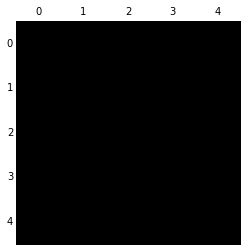

In [67]:
N = 5
#board = [[(i*N+j)%2 for j in range(N)] for i in range(N)]
board = [[0 for j in range(N)] for i in range(N)]
temp_board = deepcopy(board)
plt.matshow(board, interpolation='nearest', cmap=plt.get_cmap("gray"))
plt.grid()
plt.show()

In [68]:
def addQueen(board, pos, val=-2):
    x, y = pos
    board[x][y] = val
    val = (abs(val)+1)*val/abs(val)
    for i in range(1,N):
        board[(x+i)%N][y] = val
        board[x][(y+i)%N] = val
        for j in [1, -1]:
            for k in [1,-1]:
                if (x+i*j) >= 0 and (x+i*j) < N and (y+i*k) >= 0 and (y+i*k) < N:
                    board[(x+i*j)][(y+i*k)] = val
    plt.matshow(board, interpolation='nearest', cmap=plt.get_cmap("Set3"), vmin=-3,vmax=3)
    plt.grid()
    plt.show()
    return board

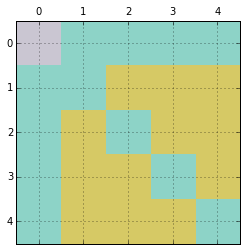

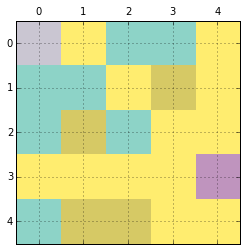

[[-2, 3, -3, -3, 3],
 [-3, -3, 3, 0, 3],
 [-3, 0, -3, 3, 3],
 [3, 3, 3, 3, 2],
 [-3, 0, 0, 3, 3]]

In [69]:
board = deepcopy(temp_board)
addQueen(board, (0,0))
addQueen(board, (N-2,N-1), val = 2)

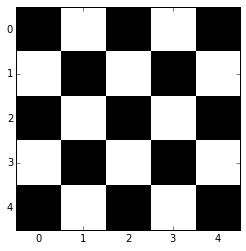

In [40]:
plt.imshow(temp_board, interpolation='nearest', cmap=plt.get_cmap("gray"))